In [41]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pickle
import os
import csv
from scipy.special import logit

save = True
save_folder = 'saved_figs'

In [36]:
def load_log(path, path_log):
    results = dict()
    with open(os.path.join(path, path_log), 'r') as f:
        creader = csv.reader(f)
        for row in creader:
            file = os.path.join(path, row[1])
            file_name = '-'.join(file.split('/')[-2].split('-')[:2])
            with open(file, 'rb') as f2:
                results[row[0]] = pickle.load(f2)
    return results

In [38]:
# Input paths.
npp_result = load_log('../npp', 'npp-demo/full_2024-07-19_15-01-09.txt')
# w/o transform: gnpp_result = load_log('../npp', 'gnpp-demo/full_2024-07-10_16-27-59.txt')
gnpp_result = load_log('../npp', 'gnpp-demo/full_2024-07-19_14-58-38.txt')
# w/o transform: gnpp_wass_result = load_log('../npp', 'gnpp-demo/full_2024-07-10_17-02-47.txt')
gnpp_wass_result = load_log('../npp', 'gnpp-demo/full_2024-07-19_14-58-38.txt')
print('NPP experiments:', npp_result.keys())
print('gNPP experiments:', gnpp_result.keys())

NPP experiments: dict_keys(['pt_spec', 'pt_miss'])
gNPP experiments: dict_keys(['wass_spec', 'wass_miss', 'ksd_miss', 'ksd_spec', 'mmd_spec', 'mmd_miss'])


In [30]:
# Styles and names.
disc_colors = {'Polya Tree': 'black', 'Wasserstein': 'cyan', 'MMD': 'green', 'KSD': 'pink'}
disc_linestyles = lambda x: {'spec': '-', 'miss': '--'}[x.split('_')[1]]
disc_labels = {'Polya Tree': 'pt', 'Wasserstein': 'wass', 'MMD': 'mmd', 'KSD': 'ksd'}
model_labels = {'NPP': 'NPP', 'gNPP': 'gNPP', 'parametric': 'parametric', 'nonparametric': 'nonparametric'}
model_colors = {'NPP': 'purple', 'gNPP': 'purple', 'parametric': 'red', 'nonparametric': 'blue'}
spec_label = {'spec': 'specified', 'miss': 'misspecified'}

# (generalized) Bayes factor  

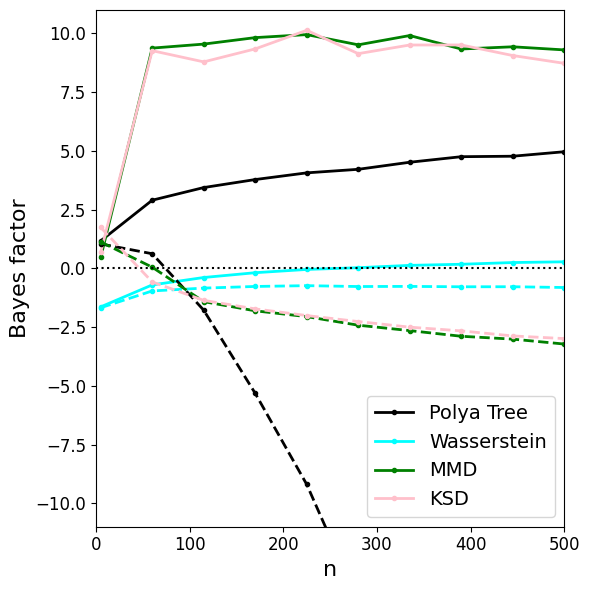

In [42]:
# Plot average (log) Bayes factors
plt.figure(figsize=(6, 6))
label = 'Polya Tree'
exper = 'pt_spec'
plt.plot(npp_result[exper]['ns'], np.mean(npp_result[exper]['BFs'], axis=0), 
         linewidth=2, linestyle=disc_linestyles(exper), label=label, color=disc_colors[label], marker='.')
for label in ['Wasserstein', 'MMD', 'KSD']: 
    if label == 'Wasserstein':
        result = gnpp_wass_result
    else:
        result = gnpp_result
    exper = disc_labels[label] + '_spec'
    plt.plot(result[exper]['ns'], np.mean(logit(result[exper]['gBFs']), axis=0), 
             linewidth=2, linestyle=disc_linestyles(exper), label=label, color=disc_colors[label],
             marker='.')

plt.legend(fontsize=14)

label = 'Polya Tree'
exper = 'pt_miss'
plt.plot(npp_result[exper]['ns'], np.mean(npp_result[exper]['BFs'], axis=0), 
         linewidth=2, linestyle=disc_linestyles(exper), label=label, color=disc_colors[label], marker='.')
for label in ['Wasserstein', 'MMD', 'KSD']: 
    if label == 'Wasserstein':
        result = gnpp_wass_result
    else:
        result = gnpp_result
    exper = disc_labels[label] + '_miss'
    plt.plot(result[exper]['ns'], np.mean(logit(result[exper]['gBFs']), axis=0), 
             linewidth=2, linestyle=disc_linestyles(exper), label=label, color=disc_colors[label], marker='.')

plt.ylabel('Bayes factor', fontsize=16)
plt.xlabel('n', fontsize=16)
xlims = [0, gnpp_result[exper]['ns'][-1]]
plt.plot(xlims, [0, 0], 'k:')
plt.xlim(xlims)
plt.ylim([-11, 11])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.tight_layout()
if save:
    plt.savefig(os.path.join(save_folder, 'BayesFactor.pdf'))

# NPP Model

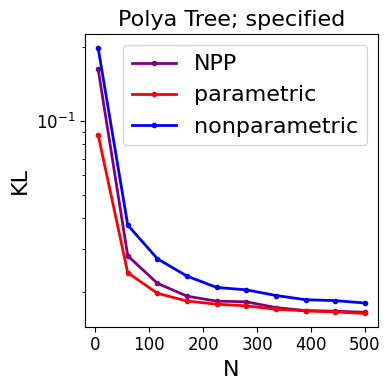

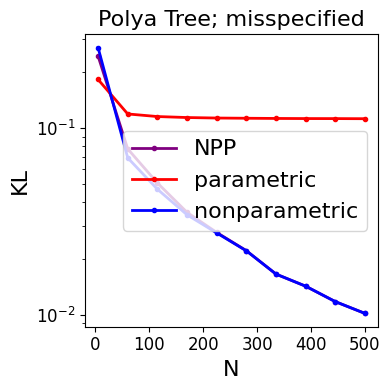

In [43]:
for specified in ['spec', 'miss']:
    exper = 'pt_' + specified
    plt.figure(figsize=(4, 4))
    for nm in ['NPP', 'parametric', 'nonparametric']:
        ns = npp_result[exper]['ns']
        kl = npp_result[exper][nm + '_kl']
        kl_mn = np.mean(kl, axis=0)
        plt.plot(ns, kl_mn, label=model_labels[nm], color=model_colors[nm], linewidth=2, marker='.')
    plt.legend(fontsize=16)
    plt.xlabel('N', fontsize=16)
    plt.ylabel('KL', fontsize=16)
    plt.yscale('log')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('Polya Tree; ' + spec_label[specified], fontsize=16)
    plt.tight_layout()
    if save:
        plt.savefig(os.path.join(save_folder, exper + '_kl.pdf'))

# gNPP Model

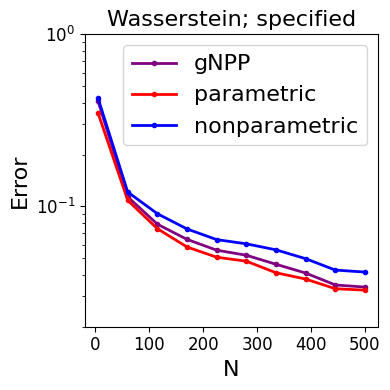

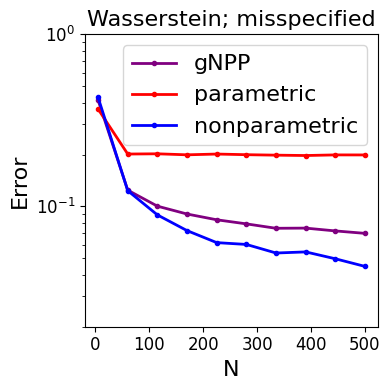

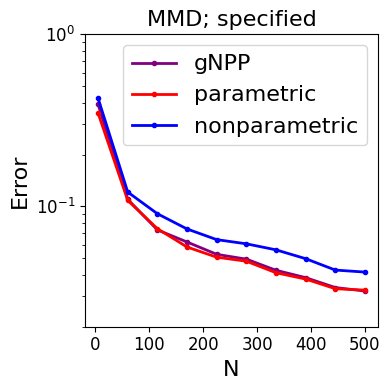

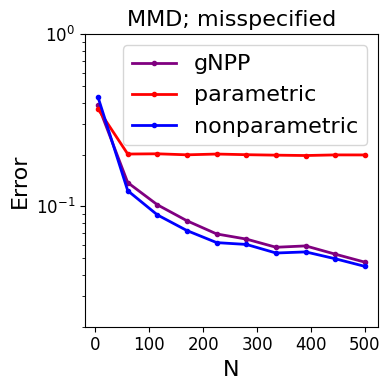

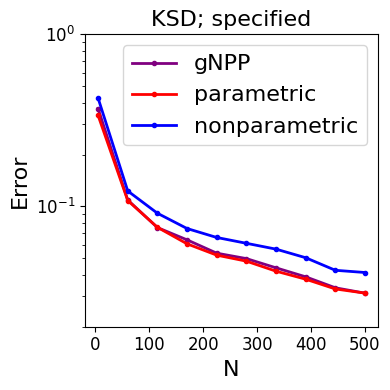

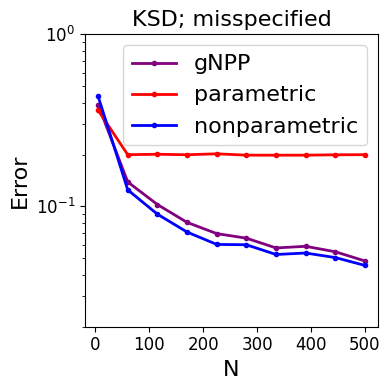

In [44]:
for label in ['Wasserstein', 'MMD', 'KSD']: 
    if label == 'Wasserstein':
        result = gnpp_wass_result
    else:
        result = gnpp_result
    for specified in ['spec', 'miss']:
        exper = disc_labels[label] + '_' + specified
        plt.figure(figsize=(4, 4))
        for nm in ['gNPP', 'parametric', 'nonparametric']:
            ns = result[exper]['ns']
            point_err = result[exper][nm + '_point_err']
            point_err_mn = np.mean(point_err, axis=0)
            plt.plot(ns, point_err_mn, label=model_labels[nm], color=model_colors[nm], linewidth=2, marker='.')
        plt.legend(fontsize=16)
        plt.xlabel('N', fontsize=16)
        plt.ylabel('Error', fontsize=16)
        plt.yscale('log')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(label + '; ' + spec_label[specified], fontsize=16)
        plt.ylim([0.02, 1])
        plt.tight_layout()
        if save:
            plt.savefig(os.path.join(save_folder, exper + '_error.pdf'))

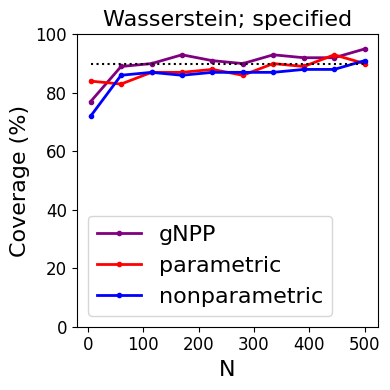

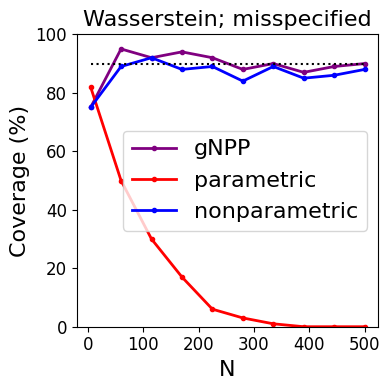

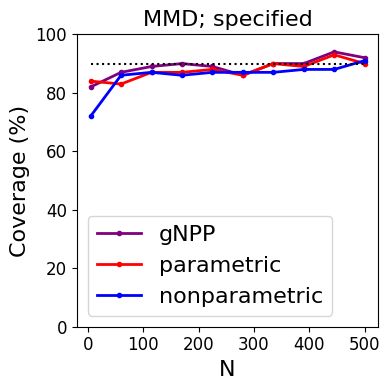

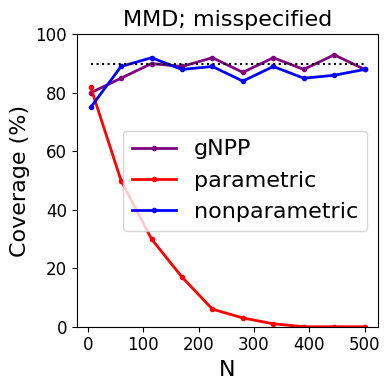

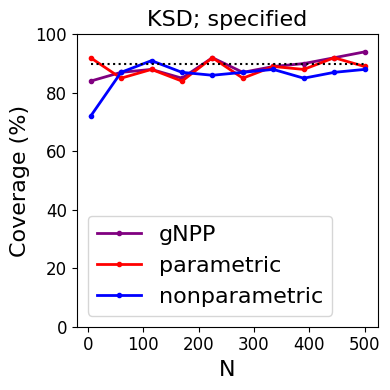

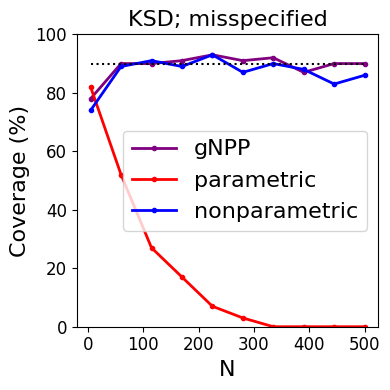

In [45]:
for label in ['Wasserstein', 'MMD', 'KSD']: 
    if label == 'Wasserstein':
        result = gnpp_wass_result
    else:
        result = gnpp_result
    for specified in ['spec', 'miss']:
        exper = disc_labels[label] + '_' + specified
        plt.figure(figsize=(4, 4))
        for nm in ['gNPP', 'parametric', 'nonparametric']:
            ns = result[exper]['ns']
            coverage = result[exper][nm + '_coverage']
            plt.plot(ns, coverage * 100, label=model_labels[nm], color=model_colors[nm], linewidth=2, marker='.')
        plt.legend(fontsize=16)
        plt.xlabel('N', fontsize=16)
        plt.ylabel('Coverage (%)', fontsize=16)
        plt.ylim([0., 100.])
        plt.plot(ns, result[exper]['target_coverage'] * np.ones_like(ns), 'k:')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(label + '; ' + spec_label[specified], fontsize=16)
        plt.tight_layout()
        if save:
            plt.savefig(os.path.join(save_folder, exper + '_coverage.pdf'))

# Compare rates

In [54]:
gnpp_rate_result = load_log('../npp', 'gnpp-demo/full_2024-07-19_16-34-58.txt')

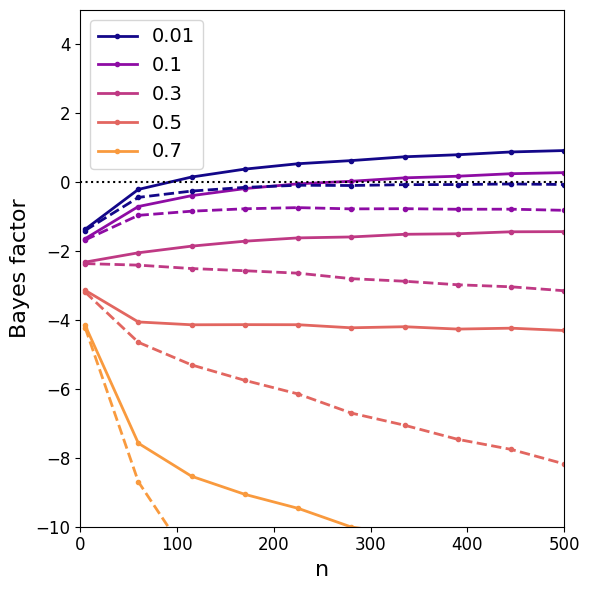

In [63]:
plt.figure(figsize=(6, 6))
color_fn = lambda x: int((x > 0.02) * 55 + 200*x)
for exper in gnpp_rate_result:
    if exper.split('_')[1] == 'spec':
        rate = float(exper.split('_')[-1])/100
        plt.plot(gnpp_rate_result[exper]['ns'], np.mean(logit(gnpp_rate_result[exper]['gBFs']), axis=0), 
                     linewidth=2, linestyle=disc_linestyles(exper), label='{:.2}'.format(rate), color=colormaps['plasma'](color_fn(rate)),
                     marker='.')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 3, 1, 4, 0] #range(5) # [1,0,2,3,4]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], fontsize=14)
# plt.legend(fontsize=16)
for exper in gnpp_rate_result:
    if exper.split('_')[1] == 'miss':
        rate = float(exper.split('_')[-1])/100
        plt.plot(gnpp_rate_result[exper]['ns'], np.mean(logit(gnpp_rate_result[exper]['gBFs']), axis=0), 
                     linewidth=2, linestyle=disc_linestyles(exper), color=colormaps['plasma'](color_fn(rate)),
                     marker='.')

plt.ylabel('Bayes factor', fontsize=16)
plt.xlabel('n', fontsize=16)
xlims = [0, gnpp_rate_result[exper]['ns'][-1]]
plt.plot(xlims, [0, 0], 'k:')
plt.xlim(xlims)
plt.ylim([-10, 5])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
plt.tight_layout()
if save:
    plt.savefig(os.path.join(save_folder, 'wass_rate_comparison.pdf'))